#### Multiple Linear Regression Showcase

Creating a dataset using the Python library Faker for multiple linear regression involves several steps. First, we'll generate a synthetic dataset with Faker, perform exploratory data analysis (EDA), create visuals, and then apply a multiple linear regression analysis. Here's a step-by-step guide with Python code for each step:

##### Step 1: Generate Synthetic Dataset
We'll create a synthetic dataset for multiple linear regression, where we want to predict a target variable based on multiple features.

In [1]:
import pandas as pd
from faker import Faker
import random

# Initialize Faker
fake = Faker()

# Generate synthetic data
data = []
for _ in range(100):
    age = random.randint(18, 70)
    income = random.randint(20000, 80000) + age * 1000  # Generating correlated data
    education_years = random.randint(8, 20)
    family_size = random.randint(1, 5)
    data.append([age, income, education_years, family_size])

# Create a DataFrame
columns = ["Age", "Income", "EducationYears", "FamilySize"]
df = pd.DataFrame(data, columns=columns)

# Save the dataset to a CSV file
df.to_csv("synthetic_multi_regression_dataset.csv", index=False)

Dataset Generation: We generated a synthetic dataset with four columns: Age, Income, EducationYears, and FamilySize. The goal is to predict Income based on Age, EducationYears, and FamilySize. We added a multiple linear relationship among these variables.

##### Step 2: Exploratory Data Analysis (EDA)
Now, let's perform EDA to understand the characteristics of our dataset. We'll visualize relationships between features and the target variable.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("synthetic_multi_regression_dataset.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             100 non-null    int64
 1   Income          100 non-null    int64
 2   EducationYears  100 non-null    int64
 3   FamilySize      100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


In [9]:
# Summary statistics
df.describe()

,Age,Income,EducationYears,FamilySize
count,100.000000,100.000000,100.000000,100.00000
mean,44.080000,95439.820000,13.840000,3.05000
std,16.352605,24665.423604,3.639625,1.32859
min,18.000000,44759.000000,8.000000,1.00000
25%,30.000000,77951.000000,10.000000,2.00000
50%,43.500000,98871.500000,14.000000,3.00000
75%,59.000000,111795.250000,17.000000,4.00000
max,70.000000,143569.000000,20.000000,5.00000


In [10]:
# Correlation matrix
df.corr()

,Age,Income,EducationYears,FamilySize
Age,1.000000,0.739415,-0.251131,0.022131
Income,0.739415,1.000000,-0.167883,0.037512
EducationYears,-0.251131,-0.167883,1.000000,0.141627
FamilySize,0.022131,0.037512,0.141627,1.000000


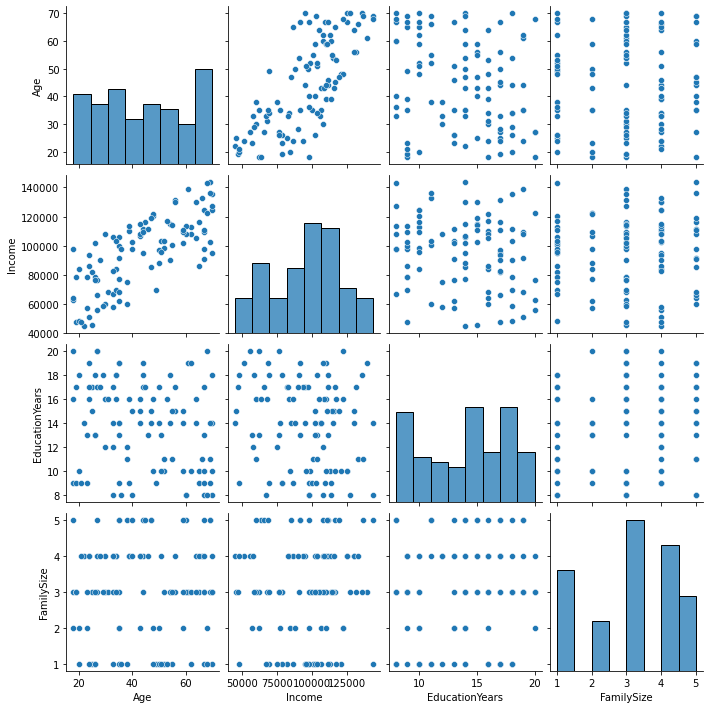

In [5]:
# Pairplot to visualize relationships between numeric variables
sns.pairplot(df)
plt.show()

Exploratory Data Analysis (EDA): We created a pairplot to visualize relationships between numeric variables. EDA helps us understand data distributions and identify potential correlations.

##### Step 3: Multiple Linear Regression Analysis
Now, let's apply multiple linear regression analysis to predict Income based on Age, EducationYears, and FamilySize. We'll split the data into training and testing sets, fit the linear regression model, and evaluate its performance.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target (y)
X = df[["Age", "EducationYears", "FamilySize"]]
y = df["Income"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the multiple linear regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = regression_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 387249927.8270328
R-squared: 0.1077191701915825


Multiple Linear Regression Analysis: We applied multiple linear regression to predict Income based on Age, EducationYears, and FamilySize. We split the data into training and testing sets, trained the linear regression model, and evaluated its performance using mean squared error (MSE) and R-squared (R2) metrics.

Mean Squared Error (MSE) measures the average squared difference between predicted and actual values. Lower MSE values indicate better model fit.

R-squared (R2) measures the proportion of the variance in the target variable that is predictable from the features. A higher R2 indicates a better fit.